<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/Image_processing/Autoencoders/01_Image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

## **Loading data**

In [52]:
(x_train_i, y_train_i), (x_test_i, y_test_i) = mnist.load_data()

len(x_train_i), len(y_train_i), len(x_test_i), len(y_test_i)

(60000, 60000, 10000, 10000)

In [53]:
x_train_i = x_train_i.astype('float32') / 255.0
x_test_i = x_test_i.astype('float32') / 255.0

In [54]:
x_train_i.shape

(60000, 28, 28)

In [55]:
x_train_reshaped = np.reshape(x_train_i, (-1,28,28,1))
x_test_reshaped = np.reshape(x_test_i, (-1,28,28,1))

x_train_reshaped.shape, x_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

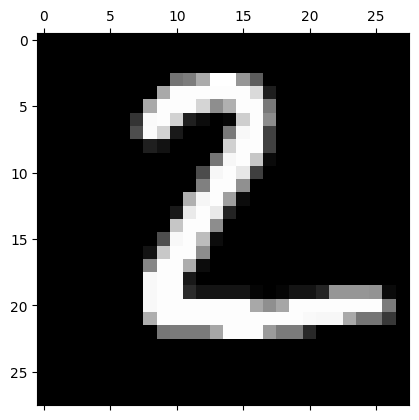

In [56]:
plt.matshow(x_test_reshaped[1], cmap='gray')
plt.show()

## **Adding noise**

In [57]:
noise_factor = 0.3
x_train_noisy_i = x_train_reshaped + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_reshaped.shape)
x_test_noisy_i = x_test_reshaped + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_reshaped.shape)

x_train_noisy_i = np.clip(x_train_noisy_i, 0., 1.)
x_test_noisy_i = np.clip(x_test_noisy_i, 0., 1.)


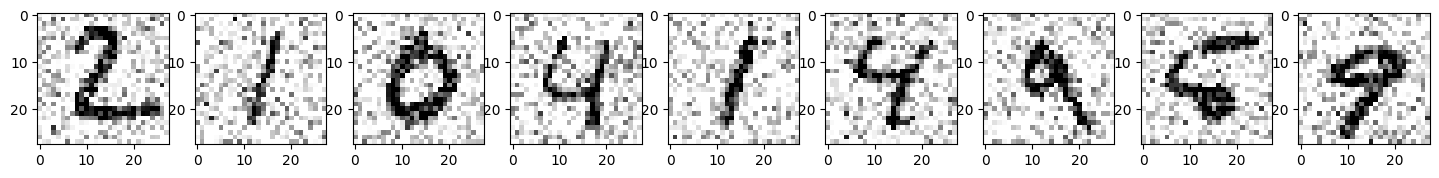

In [58]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy_i[i].reshape(28, 28), cmap="binary")
plt.show()

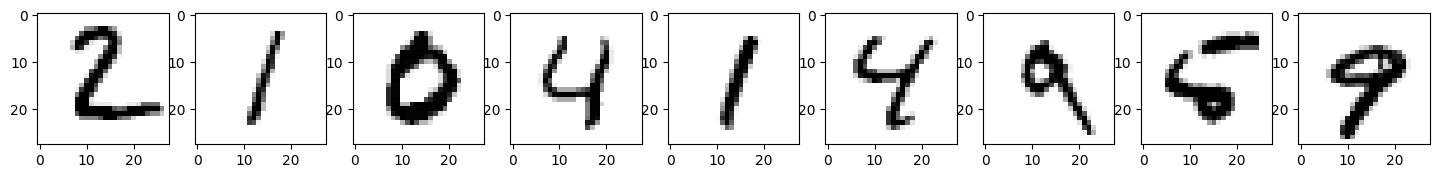

In [59]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_i[i].reshape(28, 28), cmap="binary")
plt.show()

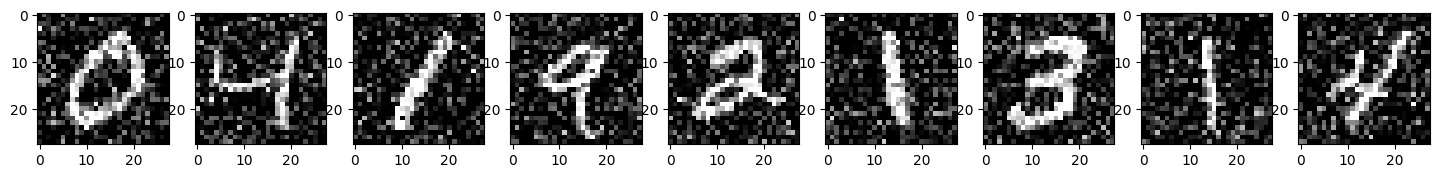

In [60]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train_noisy_i[i].reshape(28, 28), cmap="gray")
plt.show()

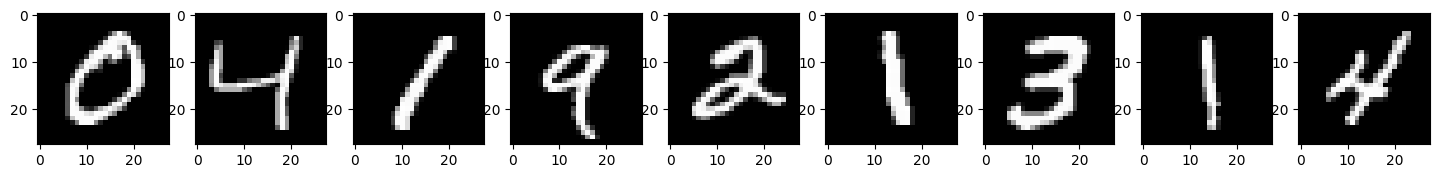

In [61]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train_i[i].reshape(28, 28), cmap="gray")
plt.show()

#### **How the noise will work**

In [62]:
np.random.normal(loc=0.0, scale=1.0, size=x_train_reshaped.shape).shape

(60000, 28, 28, 1)

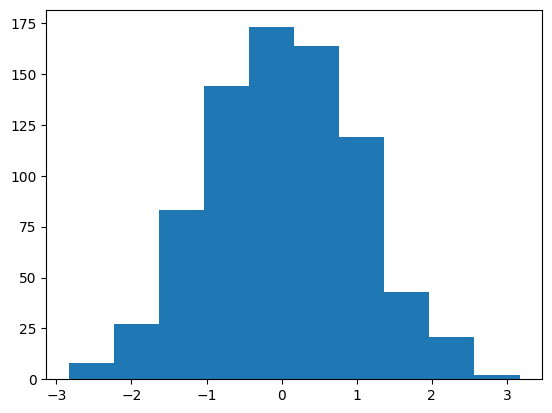

In [63]:
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=x_train_reshaped.shape)[5].reshape(-1))
plt.show()

In [64]:
x_train_reshaped.shape, x_train_noisy_i.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [65]:
x_train_noisy_i.min(), x_train_noisy_i.max()

(0.0, 1.0)

## **Build model**
### **Size of image after applying filter**
**Formula**
- Size of image = ((I-F+2P)/S) + 1
- Where,
    - I = Image size
    - F = Filter size
    - P = Padding
    - S = Strides


In [66]:
model = Sequential([
    layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),

    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.UpSampling2D((2,2)),

    layers.Conv2D(1, (3, 3), activation='relu', padding='same')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error',
              metrics=['accuracy'])

In [67]:
history_1 = model.fit(x_train_noisy_i, x_train_reshaped, epochs=10, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy_i, x_test_reshaped))

Epoch 1/10
235/235 [==============================] - 8s 23ms/step - loss: 0.0494 - accuracy: 0.7998 - val_loss: 0.0331 - val_accuracy: 0.8007
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0299 - accuracy: 0.8039 - val_loss: 0.0266 - val_accuracy: 0.8044
Epoch 3/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0254 - accuracy: 0.8064 - val_loss: 0.0239 - val_accuracy: 0.8072
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0233 - accuracy: 0.8075 - val_loss: 0.0221 - val_accuracy: 0.8075
Epoch 5/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0219 - accuracy: 0.8082 - val_loss: 0.0209 - val_accuracy: 0.8075
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0209 - accuracy: 0.8087 - val_loss: 0.0202 - val_accuracy: 0.8090
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0201 - accuracy: 0.8091 - val_loss: 0.0195 - val_accuracy: 0.8089

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 8)          

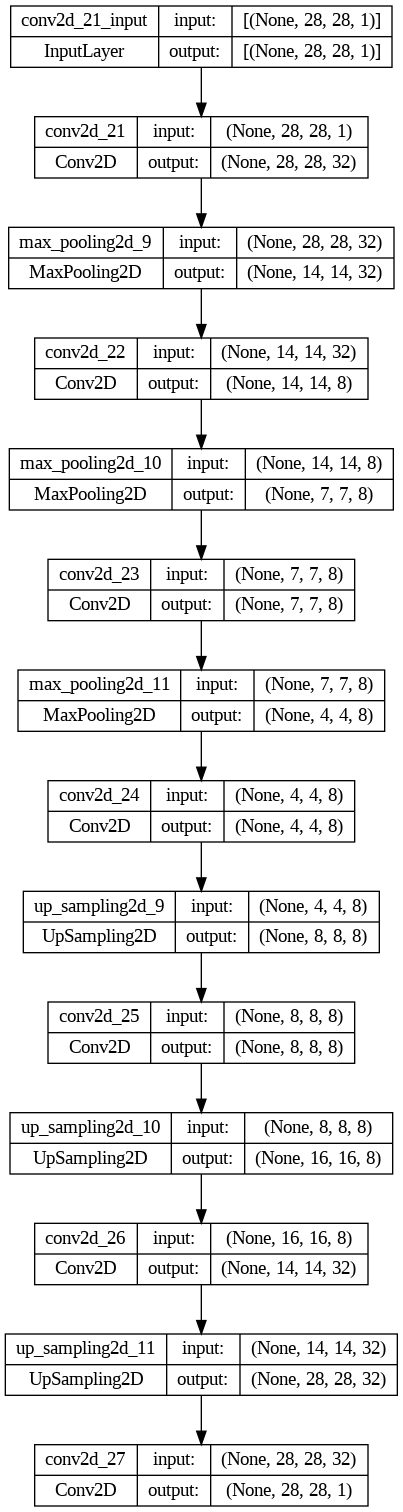

In [70]:
plot_model(model, show_shapes=True)

In [71]:
res_1 = model.predict(x_test_noisy_i)

313/313 [==============================] - 2s 6ms/step


In [73]:
x_test_noisy_i[0][tf.newaxis].shape

(1, 28, 28, 1)

1/1 [==============================] - 0s 19ms/step


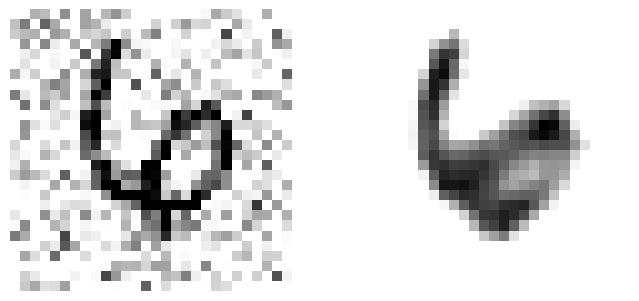

In [75]:
res2 = model.predict(x_test_noisy_i[22][tf.newaxis])

plt.figure(figsize=(8, 4))
ax = plt.subplot(1,2,1)
plt.imshow(x_test_noisy_i[22].reshape(28,28), cmap='binary')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(res2.reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

## **Model-2**

In [76]:
model_2 = tf.keras.models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),

    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.UpSampling2D((2,2)),

    layers.Conv2D(1, (3, 3), activation='relu', padding='same')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error',
              metrics=['accuracy'])

In [77]:
history_2 = model_2.fit(x_train_noisy_i, x_train_reshaped, epochs=50, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy_i, x_test_reshaped))

Epoch 1/50
235/235 [==============================] - 8s 24ms/step - loss: 0.0460 - accuracy: 0.8001 - val_loss: 0.0326 - val_accuracy: 0.8017
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0293 - accuracy: 0.8049 - val_loss: 0.0260 - val_accuracy: 0.8068
Epoch 3/50
235/235 [==============================] - 17s 73ms/step - loss: 0.0244 - accuracy: 0.8073 - val_loss: 0.0226 - val_accuracy: 0.8071
Epoch 4/50
235/235 [==============================] - 8s 34ms/step - loss: 0.0221 - accuracy: 0.8085 - val_loss: 0.0212 - val_accuracy: 0.8069
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0208 - accuracy: 0.8091 - val_loss: 0.0200 - val_accuracy: 0.8094
Epoch 6/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0197 - accuracy: 0.8097 - val_loss: 0.0190 - val_accuracy: 0.8096
Epoch 7/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0189 - accuracy: 0.8100 - val_loss: 0.0183 - val_accuracy: 0.809

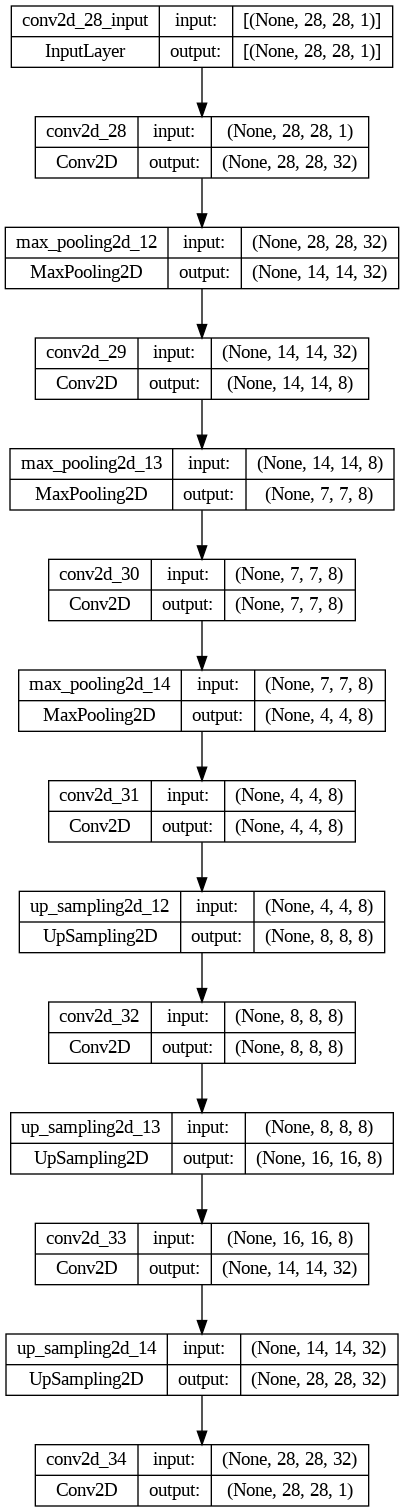

In [78]:
plot_model(model_2, show_shapes = True)

## **Predictions**

In [79]:
res_2 = model_2.predict(x_test_noisy_i)

313/313 [==============================] - 2s 5ms/step


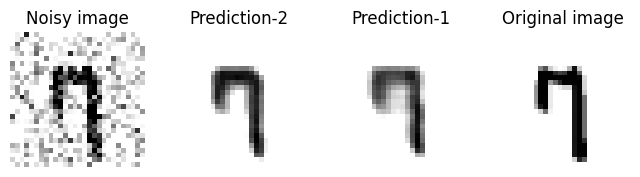

In [80]:
plt.figure(figsize=(8,5))
plt.subplot(1,4,1)
plt.imshow(x_test_noisy_i[80], cmap='binary')
plt.title("Noisy image")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(res_2[80].reshape(28,28), cmap='binary')
plt.title("Prediction-2")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(res_1[80].reshape(28,28), cmap='binary')
plt.title("Prediction-1")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(x_test_reshaped[80], cmap='binary')
plt.title("Original image")
plt.axis('off')


plt.show()

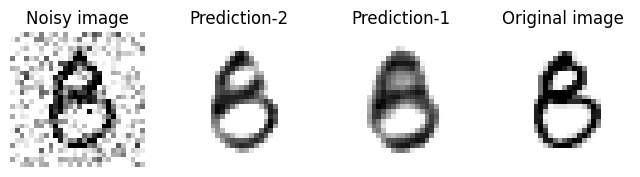

In [81]:
plt.figure(figsize=(8,5))
plt.subplot(1,4,1)
plt.imshow(x_test_noisy_i[800], cmap='binary')
plt.title("Noisy image")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(res_2[800].reshape(28,28), cmap='binary')
plt.title("Prediction-2")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(res_1[800].reshape(28,28), cmap='binary')
plt.title("Prediction-1")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(x_test_reshaped[800], cmap='binary')
plt.title("Original image")
plt.axis('off')


plt.show()

In [82]:
model.evaluate(x_test_noisy_i, x_test_reshaped)

313/313 [==============================] - 3s 10ms/step - loss: 0.0179 - accuracy: 0.8092


[0.01785951666533947, 0.8091892600059509]

In [83]:
model_2.evaluate(x_test_noisy_i, x_test_reshaped)

313/313 [==============================] - 7s 22ms/step - loss: 0.0126 - accuracy: 0.8121


[0.012567020021378994, 0.8120735883712769]